In [1]:
%matplotlib

Using matplotlib backend: <object object at 0x107d43100>


In [2]:
import contextily
import pygmt
import geopandas

In [4]:
gebco_url: str = 'https://maps.ccom.unh.edu/server/rest/services/GEBCO2022/GEBCO_2022_Bathymetry_GCS_Tiled/MapServer/tile/{z}/{y}/{x}'
osm_url: str = "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png"

#region = [-70.76034, -70.58229, 43.01098, 43.03034]
region = [-71, -70, 42.5, 43.5]

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -71 to -76.7367813373
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -70 to 76.7367813373
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 42.5 to -76.736781338
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 43.5 to 76.7367813366


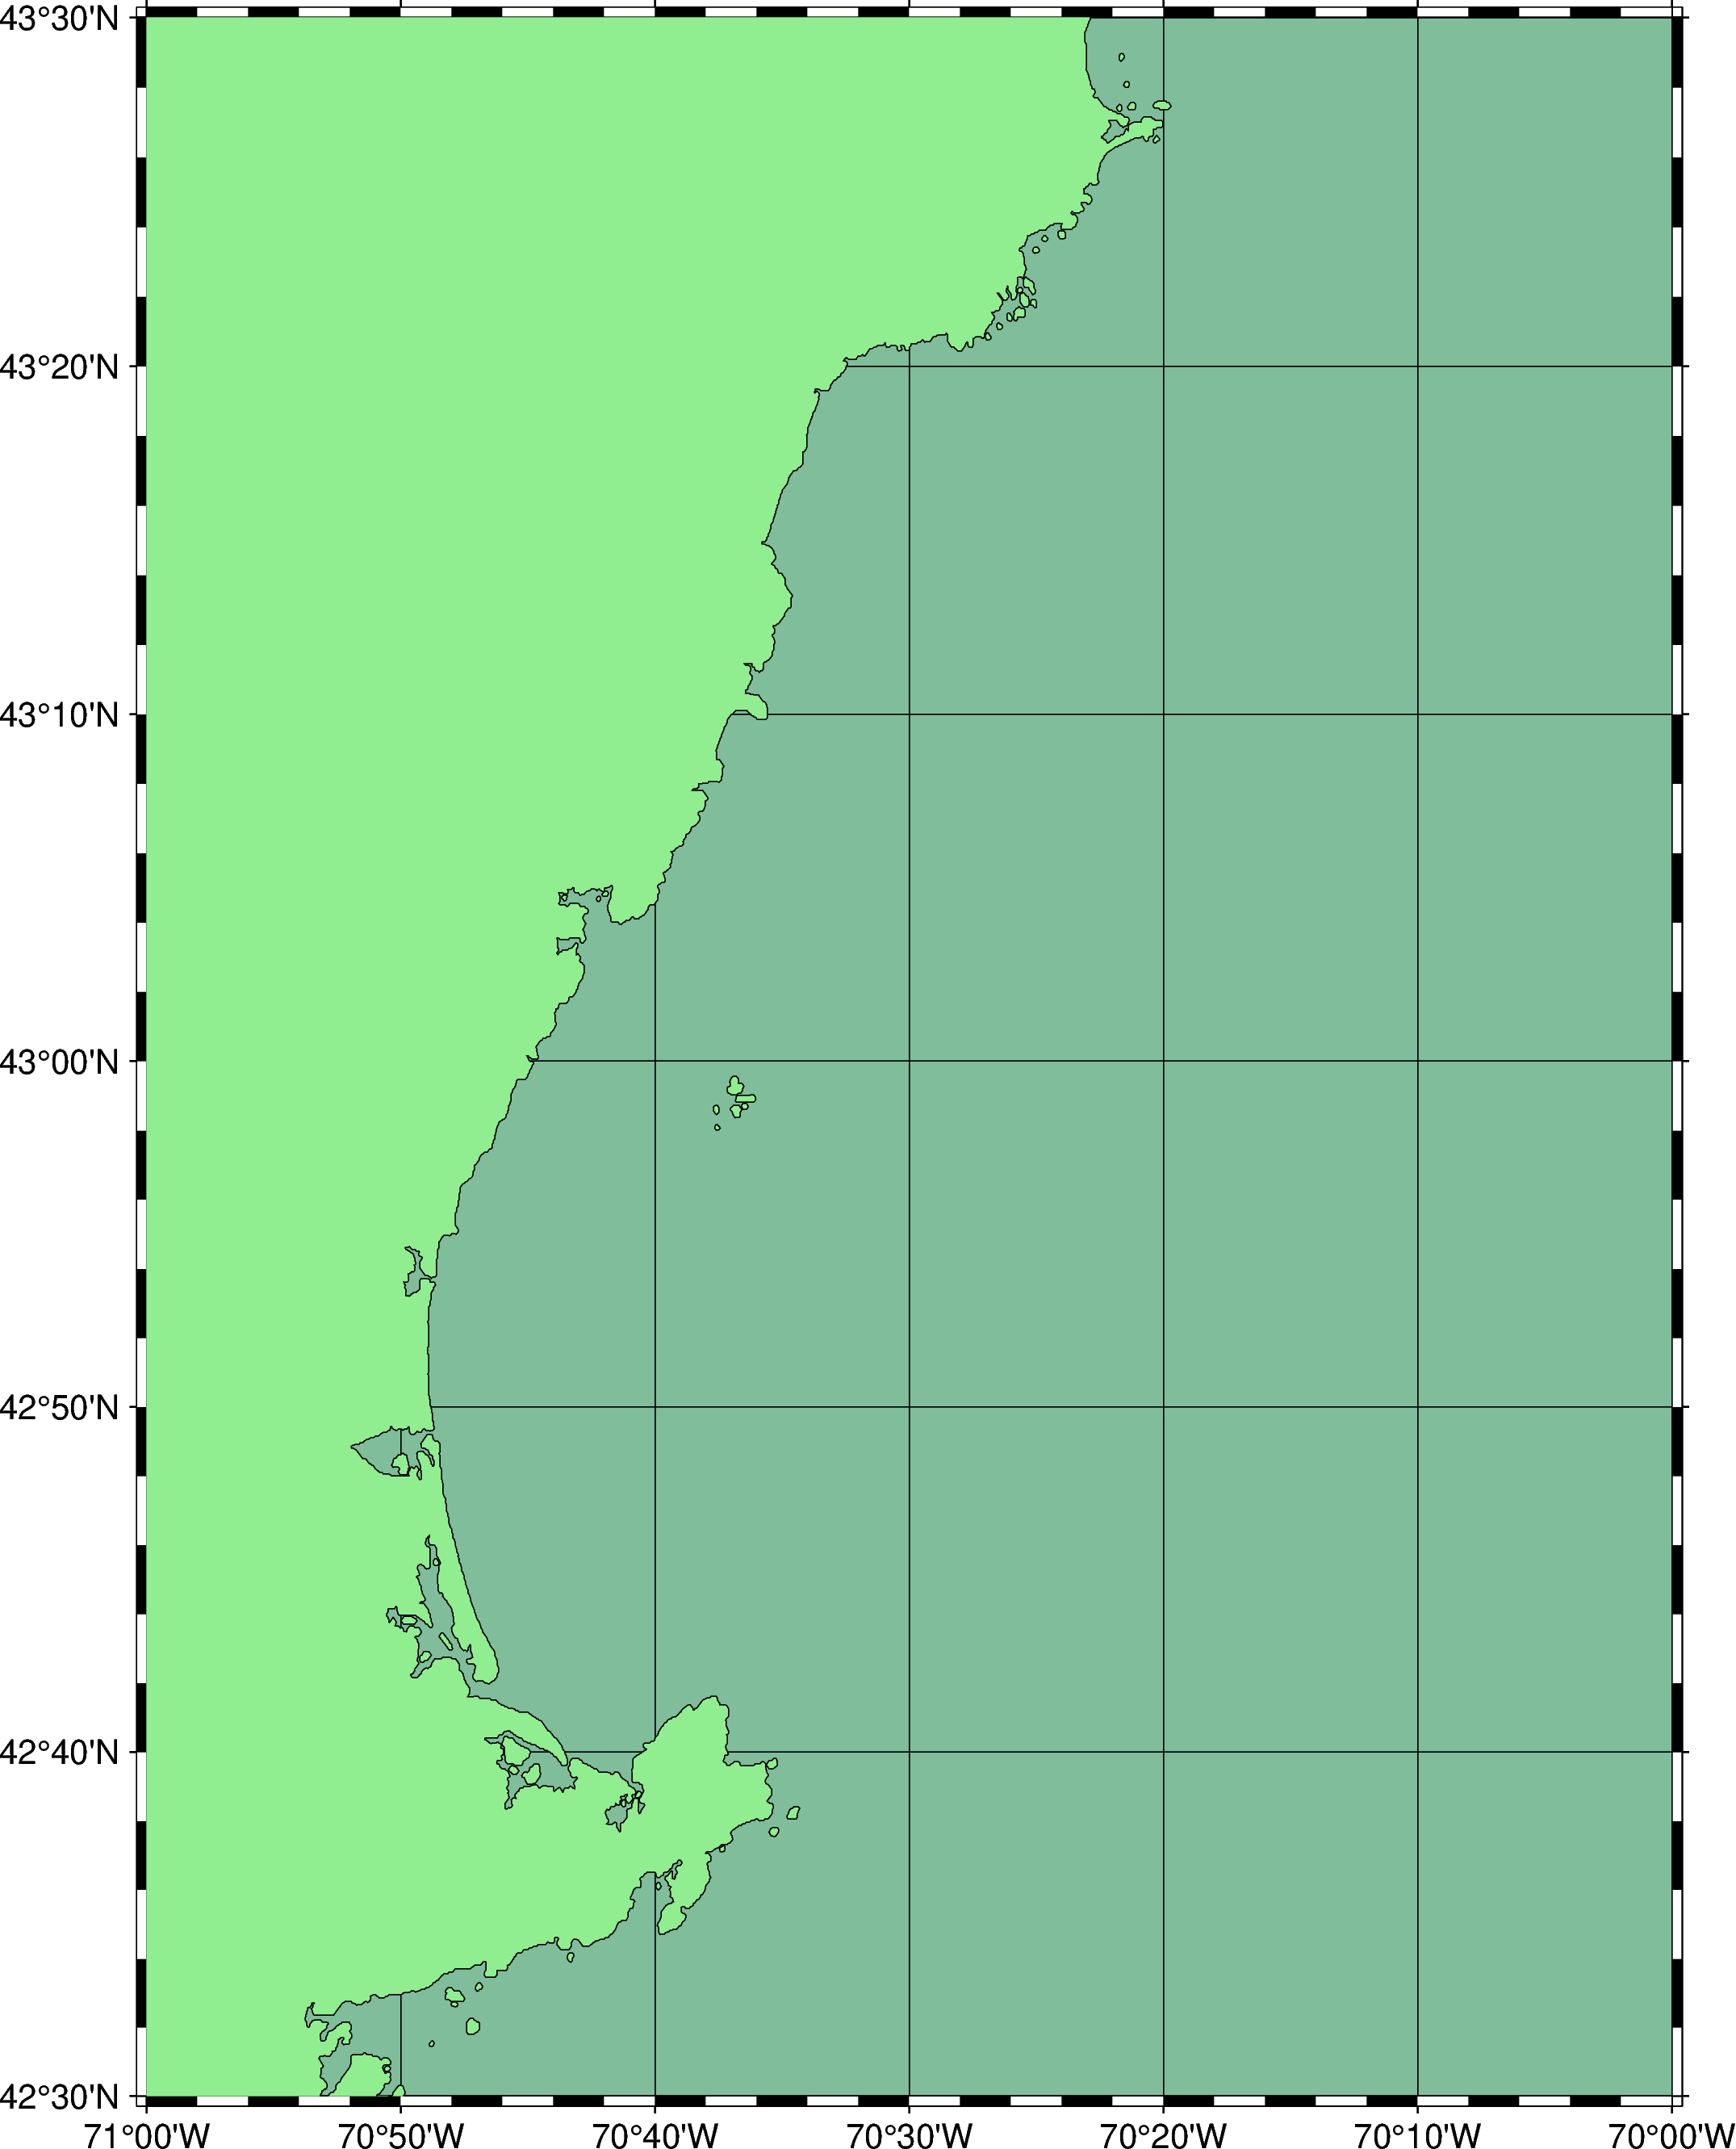

In [12]:
fig = pygmt.Figure()
fig.tilemap(
    lonlat=False,
    #region=[-70.76034, -70.58229, 43.01098, 43.03034],
    #region=[-70.5, -70.0, 42.75, 43.0],
    region=region,
    projection="M16c",
    # Set level of details (0-22)
    # Higher levels mean a zoom level closer to the Earth's
    # surface with more tiles covering a smaller
    # geographic area and thus more details and vice versa
    # Please note, not all zoom levels are always available
    zoom=10,
    # Use tiles from OpenStreetMap tile server
    source=gebco_url,
    frame="afg",
)
fig.coast(
    region=region,
    shorelines=True,
    land="lightgreen",
    #water="lightblue",
    projection="M16c",
)

fig.show()

# Let's plot the basemap from a local HDF5 file just for grins

In [3]:
gebco_path: str = '/Users/miles/Downloads/gebco_2023/GEBCO_2023.nc'
buffer = 0.1
buffer_index = 10.0

In [4]:
import xarray
gebco_ds: xarray.Dataset = xarray.open_dataset(gebco_path)

In [5]:
gebco_ds.data_vars

Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 ...

In [6]:
gebco_el: xarray.DataArray = gebco_ds['elevation']

In [7]:
gebco_el

<xarray.DataArray 'elevation' (lat: 43200, lon: 86400)>
[3732480000 values with dtype=int16]
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat      (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 89.99 90.0
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

In [8]:
from pathlib import Path

# example_data: Path = Path('data/b12_v3_1_0_example.json')
example_data: Path = Path('data/bigfile-md.json')
example_df = geopandas.read_file(example_data)
example_df['x'] = example_df.geometry.apply(lambda p: p.x)
example_df['y'] = example_df.geometry.apply(lambda p: p.y)

In [9]:
soundings_filename = f"{example_data.stem}{example_data.suffix}"

In [10]:
example_df

,depth,time,geometry,x,y
0,10.036142,2020-01-01T00:00:01.562000+00:00,POINT (-69.56929 43.00001),-69.569294,43.000006
1,10.000000,2020-01-01T00:00:01.562000+00:00,POINT (-69.56929 43.00001),-69.569294,43.000006
2,10.035526,2020-01-01T00:00:03.090000+00:00,POINT (-69.10516 43.00000),-69.105165,43.000002
3,9.900000,2020-01-01T00:00:03.090000+00:00,POINT (-69.10516 43.00000),-69.105165,43.000002
4,10.046035,2020-01-01T00:00:04.320000+00:00,POINT (-69.33133 43.00001),-69.331327,43.000006
...,...,...,...,...,...
115007,7.400000,2020-01-01T23:59:55.775002+00:00,POINT (-69.55869 43.00007),-69.558685,43.000074
115008,7.357011,2020-01-01T23:59:57.297001+00:00,POINT (-69.22148 43.00003),-69.221475,43.000027
115009,7.400000,2020-01-01T23:59:57.297001+00:00,POINT (-69.22148 43.00003),-69.221475,43.000027
115010,7.342729,2020-01-01T23:59:59.111000+00:00,POINT (-69.09026 43.00001),-69.090261,43.000010


In [11]:
example_df.plot(markersize=0.5)

2023-12-04 14:12:17.586 Python[10445:423161] ApplePersistence=NO


<Axes: >

In [12]:
example_df.total_bounds

array([-69.99740575,  43.00000016, -69.01195813,  43.01171102])

In [13]:
region = [example_df.total_bounds[0] - buffer,
          example_df.total_bounds[2] + buffer,
          example_df.total_bounds[1] - buffer,
          example_df.total_bounds[3] + buffer]
print(region)

region_inset = [example_df.total_bounds[0] - buffer_index,
                example_df.total_bounds[2] + buffer_index,
                example_df.total_bounds[1] - buffer_index,
                example_df.total_bounds[3] + buffer_index]
print(region_inset)

[-70.0974057479576, -68.91195813333334, 42.900000160357195, 43.11171101997169]
[-79.9974057479576, -59.01195813333334, 33.000000160357196, 53.01171101997169]


In [ ]:
%%timeit
f = pygmt.Figure()
f.grdimage(gebco_el, 
           region=region,
           projection="M16c",
           frame="afg",
           cmap=True)

f.coast(
    region=region,
    shorelines=True,
    land="lightgreen",
    #water="lightblue",
    projection="M16c",
)

f.plot(x=example_df.x, y=example_df.y, 
       style="c0.3c", fill="white", pen="black",
       label=f"Soundings from '{soundings_filename}'")

f.colorbar(position="JBC", frame=["x+lGEBCO 2023 depth", "y+lm"])

f.legend()

with f.inset(
    position="jBR+o0.1c",
    box="+gwhite+p1p",
    region=region_inset,
    projection="M2c",
):
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    f.coast(
        land="grey",
        water="white"
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main
    # figure. "+s" means that the first two columns are the longitude and
    # latitude of the bottom left corner of the rectangle, and the last two
    # columns the longitude and latitude of the uppper right corner.
    rectangle = [[region[0], region[2], 
                  region[1], region[3]]]
    f.plot(data=rectangle, style="r+s", pen="2p,blue")

f.show()
#f.savefig('testplot.pdf')

# Convert GeoJSON into GeoTIFF to be plotted as an image

```shell
gdal_rasterize -a_srs EPSG:4326 -tr 0.0005 0.0005 -co COMPRESS=DEFLATE -co ZLEVEL=9 -a depth bigfile-md.json bigfile-md.tif

gdal_rasterize -a_srs EPSG:4326 -tr 0.0005 0.0005 -ot UInt16 -co COMPRESS=DEFLATE -co ZLEVEL=9 -a depth bigfile-md.json bigfile-md.tif
```

# Read in gridded data instead of raw GeoJSON

In [ ]:
import rioxarray

In [ ]:
soundings = rioxarray.open_rasterio('data/bigfile-md.tif')

In [ ]:
soundings

In [ ]:
xmin = float(min(soundings.x).data)
xmax = float(max(soundings.x).data)
ymin = float(min(soundings.y).data)
ymax = float(max(soundings.y).data)

In [ ]:
region = [xmin - buffer,
          xmax + buffer,
          ymin - buffer,
          ymax + buffer]
print(region)

region_inset = [xmin - buffer_index,
                xmax + buffer_index,
                ymin - buffer_index,
                ymax + buffer_index]
print(region_inset)

In [ ]:
f = pygmt.Figure()
f.grdimage(gebco_el, 
           region=region,
           projection="M16c",
           frame="afg",
           cmap=True)

f.coast(
    region=region,
    shorelines=True,
    land="lightgreen",
    #water="lightblue",
    projection="M16c",
)

# f.plot(x=example_df.x, y=example_df.y, 
#        style="c0.3c", fill="white", pen="black",
#        label=f"Soundings from '{soundings_filename}'")

# f.gridimage(soundings)

f.colorbar(position="JBC", frame=["x+lGEBCO 2023 depth", "y+lm"])

# f.legend()

with f.inset(
    position="jBR+o0.1c",
    box="+gwhite+p1p",
    region=region_inset,
    projection="M2c",
):
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    f.coast(
        land="grey",
        water="white"
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main
    # figure. "+s" means that the first two columns are the longitude and
    # latitude of the bottom left corner of the rectangle, and the last two
    # columns the longitude and latitude of the uppper right corner.
    rectangle = [[region[0], region[2], 
                  region[1], region[3]]]
    f.plot(data=rectangle, style="r+s", pen="2p,blue")

f.show()